# Grape V1 Data Plots
The purpose of this notebook is to provide a one-stop shop for plotting data from the prototype of the Grape 1 Low-Cost Personal Space Weather Station. 

This notebook was created by Kristina Collins KD8OXT. Code was contributed by Aidan Montare KB3UMD, Bob Benedict KD8CGH, and Nathaniel Frissell W2NAF. Hardware designed by John Gibbons. Node maintainers are listed in the `nodelist.csv` file which accompanies this notebook.

## Instructions:
Data is permanently stored at [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.6622112.svg)](https://doi.org/10.5281/zenodo.6622112). To use this notebook, download the data from the repository and unzip it into the `data/` directory.

In [1]:
import datetime
import pytz

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from hamsci_psws import geopack,grape1

In [2]:
mpl.rcParams['font.size']        = 16
mpl.rcParams['font.weight']      = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.grid']        = True
mpl.rcParams['grid.linestyle']   = ':'
mpl.rcParams['figure.figsize']   = np.array([15, 8])
mpl.rcParams['axes.xmargin']     = 0

# Generate Data Overview
The first step is to pull the list of filenames from the server maintained by the WWV Amateur Radio Club, WW0WWV. We will then generate a pandas dataframe from the filename list using the split() function. This will tell us the earliest and latest dates of data collection; we can use these as the bounds of our analysis, or substitute in a smaller set of bounds. We'll use this to create a Data Inventory (Gantt chart) showing station availability, and maybe keograms of our data over time. While we're at it, we can also generate two versions of a station map: one static, to put in our paper; and one dynamic, showing which stations were active at a given point in time. 

## Data Inventory

In [3]:
inventory = grape1.DataInventory()

In [4]:
inventory.df

Datetime  Node   G Grid Square   Frequency  \
0    2021-10-02 00:00:00+00:00    29  G1      DM45dc  10000000.0   
1    2021-06-13 00:00:00+00:00     8  S1      EN91fl  10000000.0   
2    2021-01-06 00:00:00+00:00     2  S1      EN91fl   2500000.0   
3    2021-10-11 00:00:00+00:00     2  S1      EN91fl   2500000.0   
4    2021-05-22 00:00:00+00:00    13  S1      DN70ln  10000000.0   
...                        ...   ...  ..         ...         ...   
8538 2021-06-30 00:00:00+00:00    15  G1      FN20mp  10000000.0   
8539 2021-06-03 01:55:39+00:00     2  S1      EN91fl   2500000.0   
8540 2021-12-03 00:00:00+00:00    29  G1      DM45dc  10000000.0   
8541 2022-03-01 00:00:00+00:00    39  G1      EM73ut  10000000.0   
8542 2022-04-04 00:00:00+00:00     7  G1      EN91fh  10000000.0   

                                               Filename  
0     2021-10-02T000000Z_N0000029_G1_DM45dc_FRQ_WWV1...  
1     2021-06-13T000000Z_N0000008_S1_EN91fl_FRQ_WWV1...  
2     2021-01-06T000000Z_N0000002_S1_EN91fl_FRQ_WWV2...  
3     2021-10-11T000000Z_N0000002_S1_EN91fl_FRQ_WWV2...  
4     2021-05-22T000000Z_N0000013_S1_DN70ln_FRQ_WWV1...  
...                                                 ...  
8538  2021-06-30T000000Z_N0000015_G1_FN20mp_FRQ_WWV1...  
8539  2021-06-03T015539Z_N0000002_S1_EN91fl_FRQ_WWV2...  
8540  2021-12-03T000000Z_N0000029_G1_DM45dc_FRQ_WWV1...  
8541  2022-03-01T000000Z_N0000039_G1_EM73ut_FRQ_WWV1...  
8542  2022-04-04T000000Z_N0000007_G1_EN91fh_FRQ_WWV1...  

[8542 rows x 6 columns]

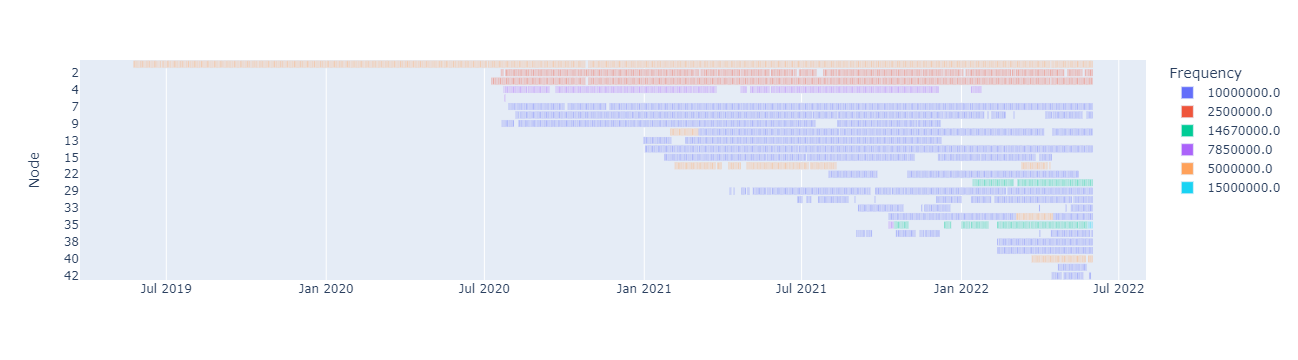

In [5]:
inventory.plot_inventory()

In [6]:
nodes = grape1.GrapeNodes(logged_nodes=inventory.logged_nodes)

## Long-Term Time Series

In [7]:
# Choose node and frequency.
node   = 7
freq   = 10e6 # MHz

# Compute WWV-Node Midpoint
lat       = nodes.nodes_df.loc[node,'Latitude']
lon       = nodes.nodes_df.loc[node,'Longitude']
wwv_lat   =   40.6683
wwv_lon   = -105.0384
ret       = geopack.midpoint(wwv_lat,wwv_lon,lat,lon)
solar_lat = ret[0][0]
solar_lon = ret[1][0]

# Load data
gd = grape1.Grape1Data(node,freq,inventory=inventory,grape_nodes=nodes,
                      solar_lat=solar_lat, solar_lon=solar_lon)

Loading Raw Data:   0%|                                                                                       …

In [8]:
gd.process_data('5min_mean')

Processing data using "5min_mean" profile...

Resampling data with 5.0 minute cadence...
  Resampling Time: 0:00:14.435691

Computing Solar Local Time on resampled...


  0%|                                                                                                         …

  Solar Time Computation Time: 0:00:02.051643

dB Conversion
  dB Conversion Time: 0:00:00.002512

Processing: LMT - Freq
Compute Time-Date-Parameter (TDP) Array
Splitting LMT into dates...


  0%|                                                                                                         …

Splitting LMT into decimal hours...


  0%|                                                                                                         …

Filling timeDateParameter Array...


  0%|                                                                                                         …

  Time-Date-Parameter Time: 0:00:33.779758

Processing: LMT - Power_dB
Compute Time-Date-Parameter (TDP) Array
Splitting LMT into dates...


  0%|                                                                                                         …

Splitting LMT into decimal hours...


  0%|                                                                                                         …

Filling timeDateParameter Array...


  0%|                                                                                                         …

  Time-Date-Parameter Time: 0:00:33.766415

Processing: UTC - Freq
Compute Time-Date-Parameter (TDP) Array
Splitting UTC into dates...


  0%|                                                                                                         …

Splitting UTC into decimal hours...


  0%|                                                                                                         …

Filling timeDateParameter Array...


  0%|                                                                                                         …

  Time-Date-Parameter Time: 0:00:33.493551

Processing: UTC - Power_dB
Compute Time-Date-Parameter (TDP) Array
Splitting UTC into dates...


  0%|                                                                                                         …

Splitting UTC into decimal hours...


  0%|                                                                                                         …

Filling timeDateParameter Array...


  0%|                                                                                                         …

  Time-Date-Parameter Time: 0:00:33.597661


Total Processing Time: 0:02:31.127685


{'fig': <Figure size 1080x1296 with 3 Axes>}

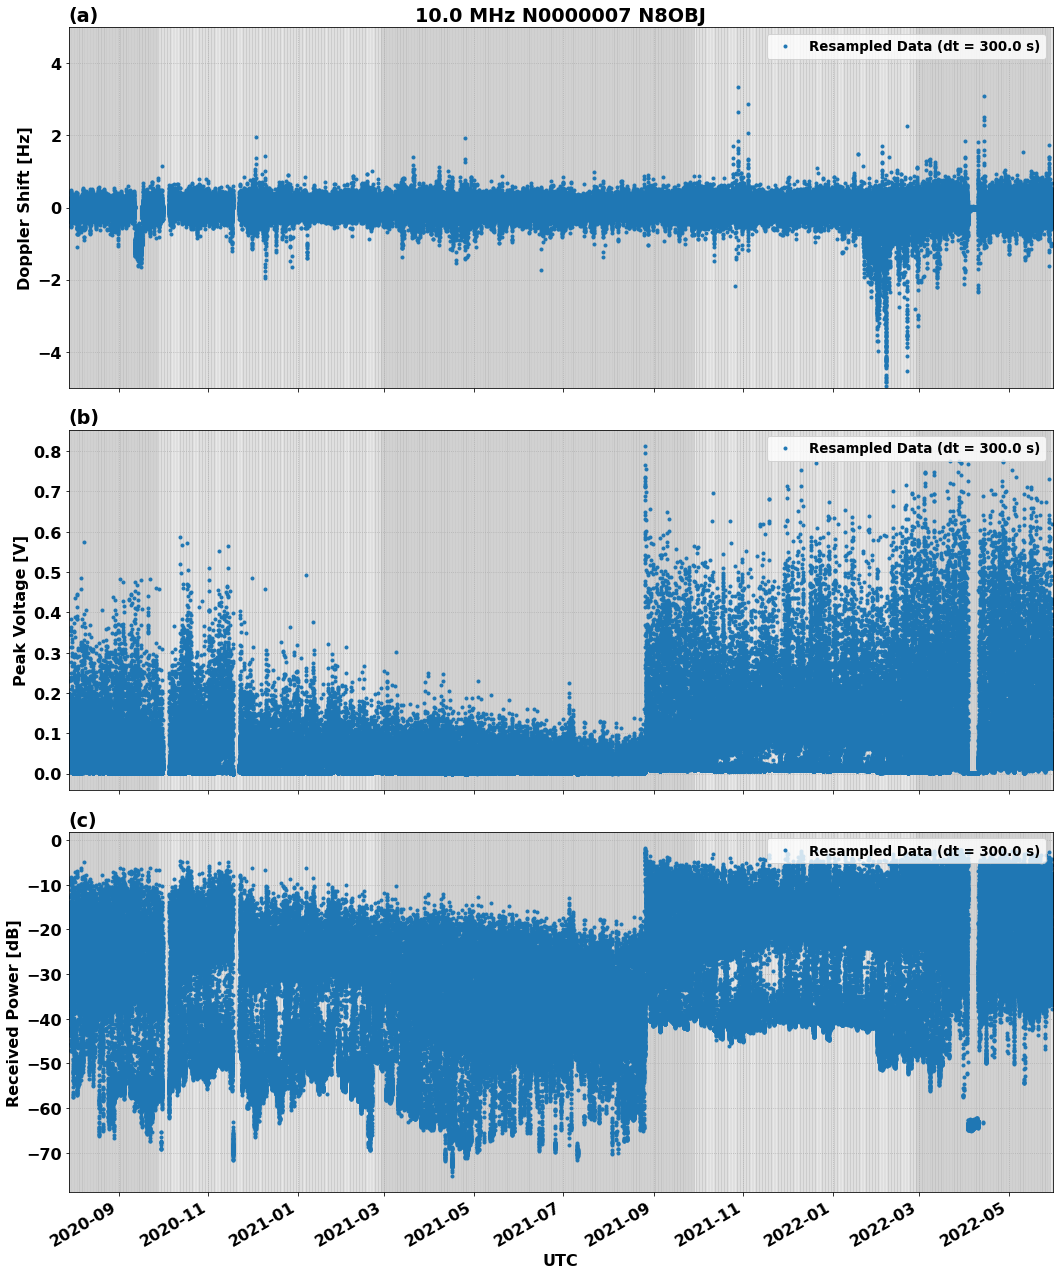

In [9]:
gd.plot_timeSeries('resampled',ylims={'Freq':(-5,5)})

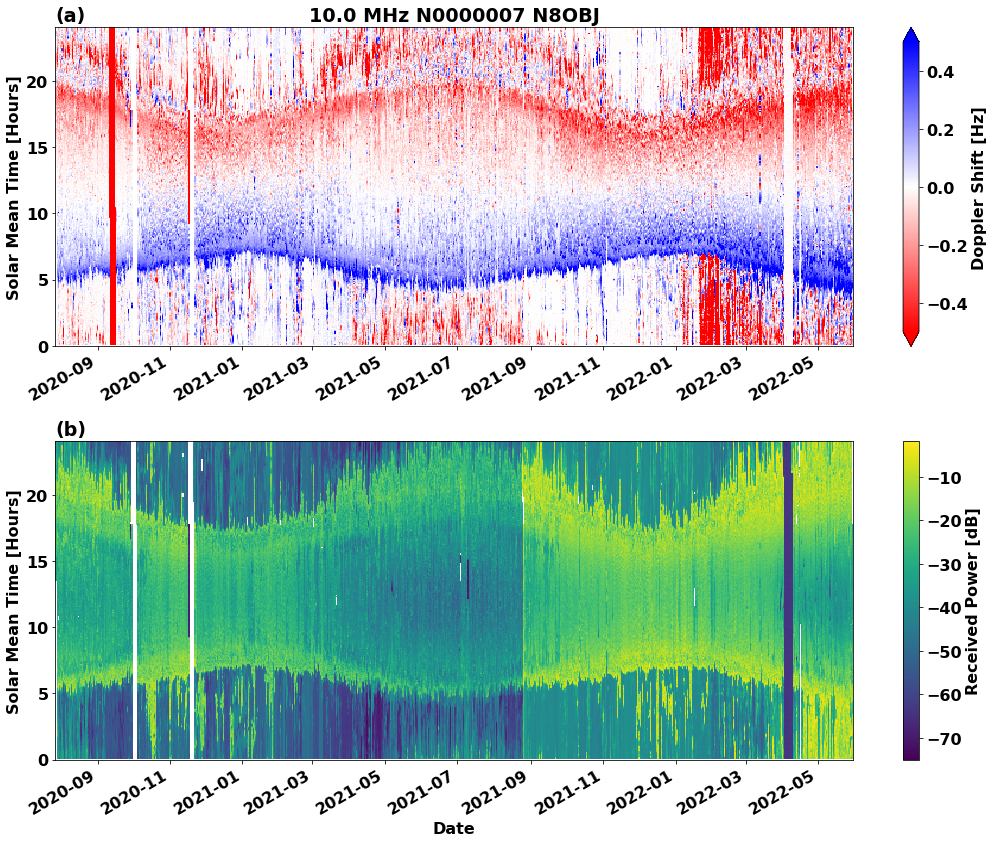

In [10]:
gd.plot_timeDateParameter('resampled',xkey='LMT')
plt.show()

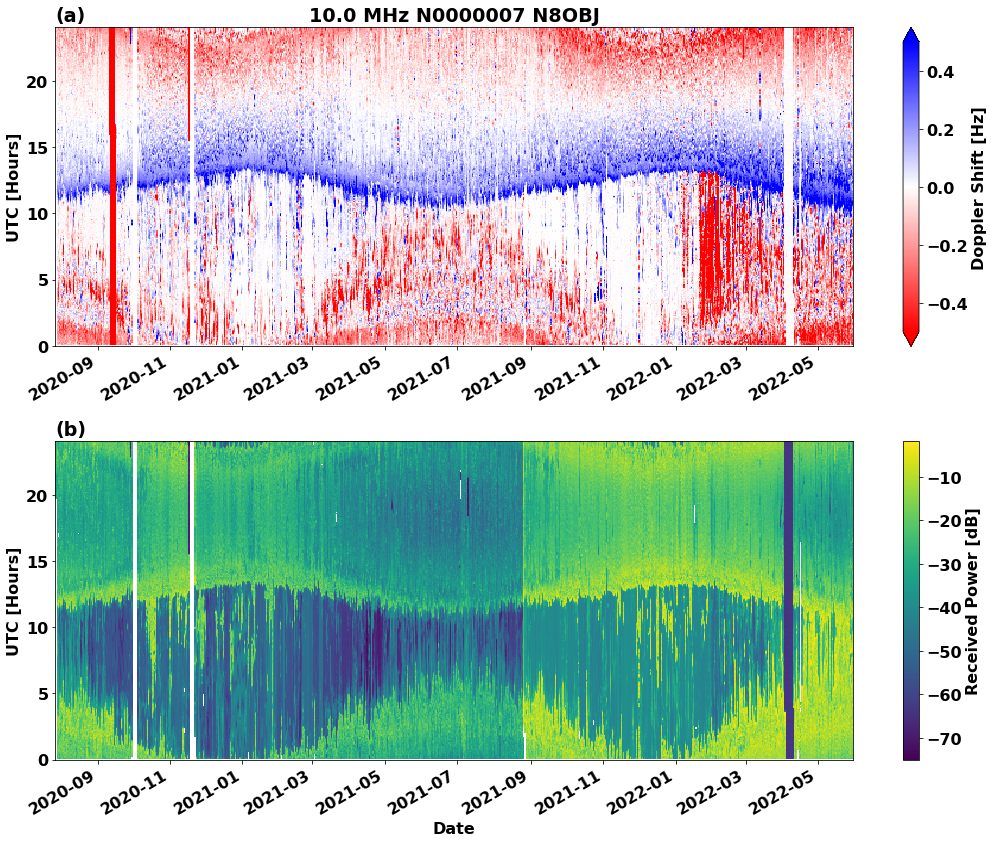

In [11]:
gd.plot_timeDateParameter('resampled',xkey='UTC')
plt.show()